# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [37]:
#- Passo 1: Entendimento do Desafio
#- Passo 2: Entendimento da Área/Empresa
#- Passo 3: Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)



,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [38]:
#- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
Preco,1.000000,0.293137,0.041266,0.113385,0.578353,0.557621,-0.036476
TipoBarco,0.293137,1.000000,0.142893,-0.130147,0.541307,0.567662,0.083989
TipoVenda,0.041266,0.142893,1.000000,-0.195147,0.148886,0.163431,0.054972
Ano,0.113385,-0.130147,-0.195147,1.000000,-0.211120,-0.105949,-0.440310
Comprimento,0.578353,0.541307,0.148886,-0.211120,1.000000,0.874952,0.123300
Largura,0.557621,0.567662,0.163431,-0.105949,0.874952,1.000000,0.084715
Material,-0.036476,0.083989,0.054972,-0.440310,0.123300,0.084715,1.000000


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


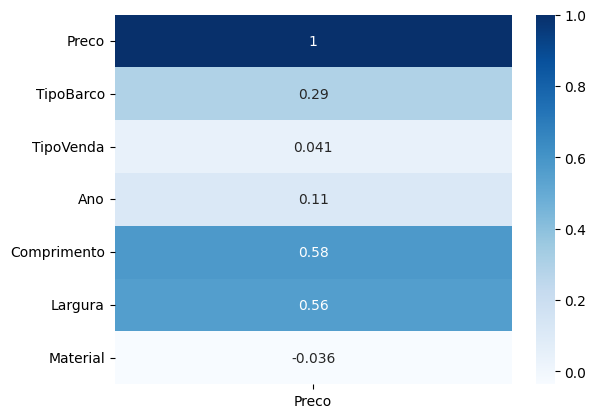

In [39]:
#- Passo 5: Análise Exploratória
#Correlação entre as informações da base de dados
showTable = tabela.corr()
display(showTable)

correlacao = tabela.corr()[["Preco"]]
display(correlacao)



import seaborn as sns
import matplotlib.pyplot as plt

#cria o grafico
sns.heatmap(correlacao, cmap="Blues", annot=True)
#exibe o grafico
plt.show()

In [40]:
#- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
    #dividir a base em x e y
    #eixo/ linha = 0. eixo/ coluna = 1 (axis=0, axis=1)
y = tabela["Preco"]

x = tabela.drop("Preco", axis=1)

#train test split
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [41]:
# importar a inteligência artificial
# RegressãoLiner & ArvoreDeDecisao
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criar inteligência artificial 
modelo_regressaolinear = LinearRegression()
modelo_arvocededecisao = RandomForestRegressor()

#treinar a inteligencia
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvocededecisao.fit(x_treino, y_treino)  

RandomForestRegressor()

In [42]:
#- Passo 7: Interpretação de Resultados

#escolher o melhor modelo
from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvorededecisao = modelo_arvocededecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvorededecisao))



0.4490324760735813
0.8547971900511311


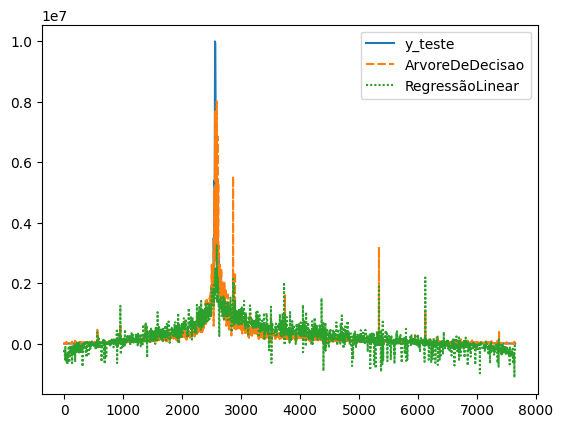

In [43]:
#visualizar as previsoes

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["ArvoreDeDecisao"] = previsao_arvorededecisao
tabela_auxiliar["RegressãoLinear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()

In [53]:
#fazer novas previsoes (usando inteligencia artificial na prática)

tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)

previsao = modelo_arvocededecisao.predict(tabela_nova)

print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5533.89933333  9336.87333333 19738.5       ]
